In [142]:
import weyl_conductance as wc
import weyl_green as wg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from ipywidgets import interact
sns.set()
sns.set_style("ticks")
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The current is
\begin{equation}
\begin{aligned}
I_{\sigma}=-4 \pi e r^{2}\langle\sigma| \sum_{k q}\{& u_{\boldsymbol{k}}^{2}\left[n_{F}\left(\xi_{q}\right)-n_{F}\left(\xi_{k}\right)\right] \delta\left(-e V-\xi^{-}\right) \\
&\left.+v_{k}^{2}\left[n_{F}\left(\xi_{q}\right)-n_{F}\left(-\xi_{k}\right)\right] \delta\left(-e V-\xi^{+}\right)\right\}|\sigma\rangle
\end{aligned}
\end{equation}
which leads to a conductance $\frac{dI}{dV}$ near the Weyl node of
\begin{equation}
G\left(k_{x}, k_{z}\right)=\frac{e^{2} r^{2}}{h} \frac{g_{1}}{\sqrt{g_{1}^{2}+h_{z}^{2}} |{h_0 }|^{1/2}}
\end{equation}
for electrons polarized in $x$.

Each node has a distinct chirality, $k_w = \chi \frac{\pi}{2}$. So to nudge within the Fermi arc, take $k_z = -\chi \delta$ with $\delta > 0$. Here, $k_z$ is $0$ at the weyl node.

# Analytic transport across

In [143]:
%matplotlib inline

res = 100
t = 1
g = 0
mu = -2
tm = 1

kxs = np.linspace(-np.pi,np.pi,num=res)

@interact(kz=(-np.pi,np.pi,0.01),r=(0,3,0.1))
def AnalyticalConductancePlot(kz=np.pi/2,r=1):
    # compute conductance
    Gs = wc.AnalyticalConductance(kxs,kz,t,g,tm,mu,r)
    # plot
    plt.figure()
    plt.plot(kxs,Gs,c='k')
    plt.ylabel(r"$G$")
    plt.xlabel(r"$k_x$")
    plt.xlim(-np.pi,np.pi)
#     plt.ylim(-10,10)
    plt.show()

interactive(children=(FloatSlider(value=1.5707963267948966, description='kz', max=3.141592653589793, min=-3.14…

<IPython.core.display.Javascript object>


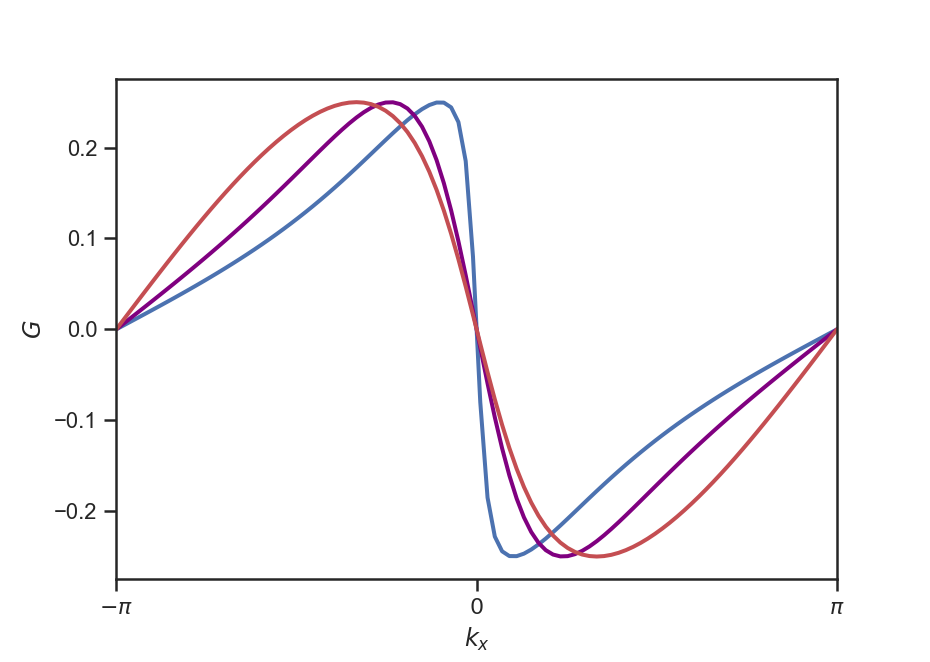

In [161]:
%matplotlib notebook

Gs_weyl = wc.AnalyticalConductance(kx=kxs,kz=np.pi/2-0.1,t=t,g=g,tm=0,mu=-4,r=1)
Gs_inter = wc.AnalyticalConductance(kx=kxs,kz=1,t=t,g=g,tm=0,mu=-4,r=1)
Gs_gamma = wc.AnalyticalConductance(kx=kxs,kz=0,t=t,g=g,tm=0,mu=-4,r=1)

# plot
plt.figure()
plt.plot(kxs,Gs_weyl,c='b',lw=2)
plt.plot(kxs,Gs_inter,c='purple',lw=2)
plt.plot(kxs,Gs_gamma,c='r',lw=2)
plt.ylabel(r"$G$")
plt.xlabel(r"$k_x$")
plt.xticks([-np.pi,0,np.pi],labels=["$-\pi$","$0$","$\pi$"])
plt.xlim(-np.pi,np.pi)
# plt.ylim(-0.6,0.6)
plt.show()

For $V<0$, only the second term in $I_{\sigma}$ contributes.

# Results from cluster

In [248]:
data_rate_05 = np.loadtxt("conductance_data_rate_0.5.csv", delimiter=',')
data_rate_1 = np.loadtxt("conductance_data_rate_1.csv", delimiter=',')
data_rate_15 = np.loadtxt("conductance_data_rate_1.5.csv", delimiter=',')

In [249]:
E_05 = data_rate_05[0::2]
G_05 = data_rate_05[1::2]
E_1 = data_rate_1[0::2]
G_1 = data_rate_1[1::2]
E_15 = data_rate_15[0::2]
G_15 = data_rate_15[1::2]

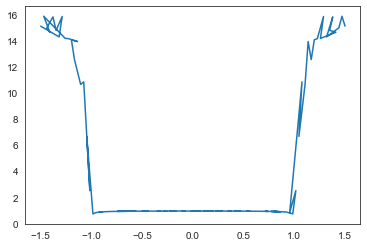

In [253]:
plt.plot(E_05,G_05)

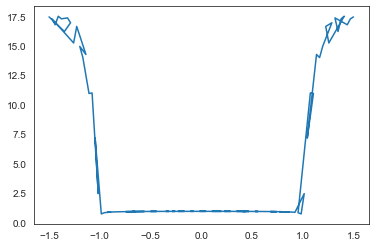

In [254]:
plt.plot(E_1,G_1)

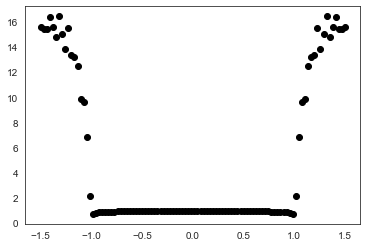

In [288]:
plt.scatter(E_15,G_15,c='k')


Results for small system size

# Preliminary results

In [31]:
size = 10
res = 100
kz = np.pi/2*0
t = 1
tm = 0
g = 0
mu = -4
r = 2.3
rate = 1.
Erange = 1.5

Es, Ts = wc.ConductanceVEnergy(size=size,res=res,Erange=Erange,kz=kz,t=t,g=g,tm=tm,mu=mu,r=r,rate=rate)
kxs, Exs = wc.SpectrumKx(size,res,kz,t,g)

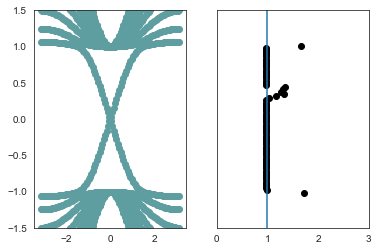

In [32]:
%matplotlib inline

fig, ax = plt.subplots(nrows=1,ncols=2,sharey=True)

ax[0].scatter(kxs,Exs,c='cadetblue')
ax[0].set_ylim(-Erange,Erange)
ax[1].scatter(Ts,Es,c='k')
# ax[1].set_xlim(0,1)
# ax[1].axvline(x=2)
# ax[1].axvline(x=4)
ax[1].axvline(x=1)
ax[1].set_xlim(-0,3)

plt.show()

# Messing around with DOS

In [112]:
size = 10
res = 1000

krange = 1
Erange = 0.8

Espace = np.linspace(-Erange,Erange,res)
kxspace = np.linspace(-krange,krange,res)

As = np.zeros((res,res),dtype=float)

for i in range(res):
    kx = kxspace[i]
    As[:,i] = wg.SpectralFunctionWeylWK(size=size,res=res,wrange=Erange,kx=kx,kz=kz,t=t,g=g,mu=mu,r=r,spin=0)

<IPython.core.display.Javascript object>


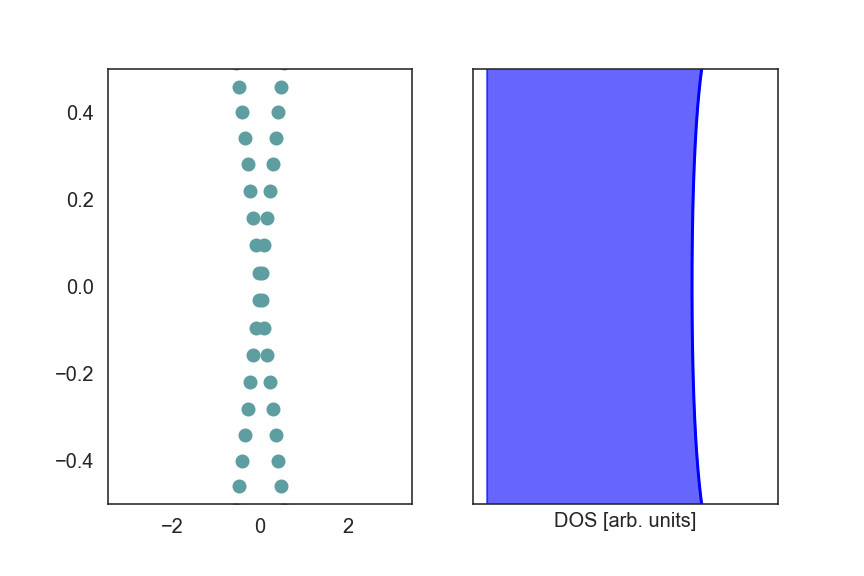

In [117]:
%matplotlib notebook

fig, ax = plt.subplots(nrows=1,ncols=2,sharey=True)

ax[0].scatter(kxs,Exs,c='cadetblue')
ax[0].set_ylim(-Erange,Erange)
ax[1].plot(np.sum(As,axis=1),Espace,c='b')
ax[1].fill_betweenx(Espace, np.sum(As,axis=1), color='blue', alpha=0.6)
ax[1].set_xticks([])
ax[1].set_xlabel("DOS [arb. units]")

plt.show()

Seems reasonable for our linear dispersion. Try with the "old-fashioned" way:

In [62]:
def Lorentzian(E,E0,width):
    """
    Lorentzian centred at E0 with width "width"
    E is the parametrization
    """
    return width / np.pi / ((E - E0)**2 + width**2)

DOS = 0

Exs_trim_ = Exs[Exs < Erange]
Exs_trim = Exs_trim_[Exs_trim_ > - Erange]

width = np.mean(np.diff(Exs_trim)) * 2 # add a smoothing factor

for E0 in Exs:
    DOS += Lorentzian(Espace,E0,width)

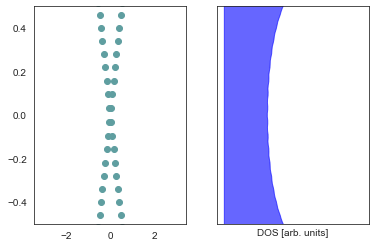

In [98]:
fig, ax = plt.subplots(nrows=1,ncols=2,sharey=True)

ax[0].scatter(kxs,Exs,c='cadetblue')
ax[0].set_ylim(-Erange,Erange)
ax[1].plot(Espace,DOS,c='b')
ax[1].fill_betweenx(Espace, DOS, color='blue', alpha=0.6)
ax[1].set_xticks([])
ax[1].set_xlabel("DOS [arb. units]")

plt.show()

Big picture is the same, but still different.

# Conductance plot

In [3]:
def CoordToRes(x,res,krange):
    # converts points to be able to plot them imshow
    return res / (2 * krange) * np.asarray(x) + res / 2

In [174]:
kz = np.pi/2
r = 2.3

size = 20
res = 100
g = 0
mu = -4
t = 1
tm = 0
wrange = 1.5
krange = np.pi

# we've already ran r=0 case
Es0, Ts0 = wc.ConductanceVEnergy(size=size,res=res,Erange=wrange,kz=kz,t=t,g=g,tm=tm,mu=mu,r=0,rate=1)
Es, Ts = wc.ConductanceVEnergy(size=size,res=res,Erange=wrange,kz=kz,t=t,g=g,tm=tm,mu=mu,r=r,rate=1)
# Es0, Ts0 = np.loadtxt("conductance_data_0_r_2.3_weyl.csv", delimiter=",")
# Es, Ts = np.loadtxt("conductance_data_r_2.3_weyl.csv", delimiter=",")

In [175]:
kxs = np.linspace(-krange,krange,res)

E0 = -np.sin(kxs)
Eb = np.sqrt(np.sin(kxs)**2 + (1 + g - np.cos(kxs) - np.cos(kz))**2)

kxs_full_0, Es_full_0, locs_0 = wg.Spectrum(size=50,res=res,krange=krange,kz=kz,t=t,g=g,tm=tm,mu=mu,r=0)
kxs_full, Es_full, locs = wg.Spectrum(size=50,res=res,krange=krange,kz=kz,t=t,g=g,tm=tm,mu=mu,r=r)

# As0 = np.zeros((res,res),dtype=float)
# As = np.zeros((res,res),dtype=float)
# for i in range(res):
#     kx = np.linspace(-krange,krange,res)[i]
#     As0[:,i] = wg.FullSpectralFunctionWeylWK(size=size,res=res,wrange=wrange,kx=kx,kz=kz,t=t,g=g,tm=tm,mu=mu,r=0,spin=0,side=1)
#     As[:,i] = wg.FullSpectralFunctionWeylWK(size=size,res=res,wrange=wrange,kx=kx,kz=kz,t=t,g=g,tm=tm,mu=mu,r=r,spin=0,side=1)

<IPython.core.display.Javascript object>


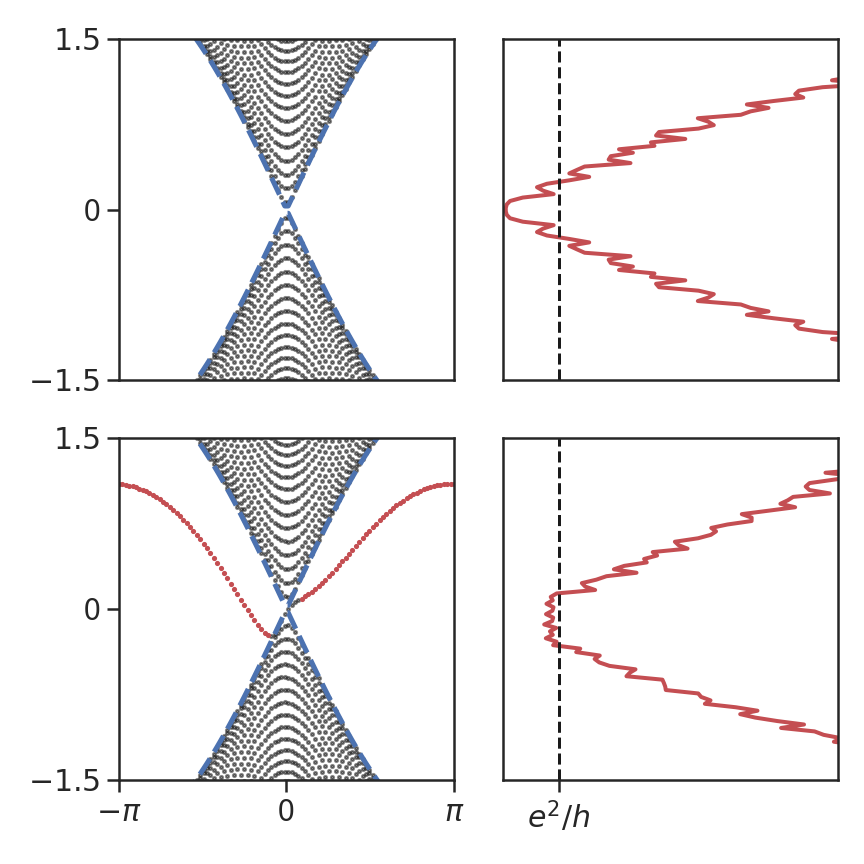

In [178]:
%matplotlib notebook

fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(6,6), sharey=False, gridspec_kw={'width_ratios': [1, 1], 'height_ratios': [1,1]})

# ax[0,0].imshow(As0)
ax[0,0].scatter(kxs_full_0[np.logical_not(locs_0)],Es_full_0[np.logical_not(locs_0)],c='k',marker='.',s=10,alpha=0.5, label="Numerics")
ax[0,0].scatter(kxs_full_0[locs_0],Es_full_0[locs_0],c='r',marker='.',alpha=1,s=10,label="Interface numerics")
ax[0,0].plot(kxs,Eb,c='b',ls='--',lw=2.5)
ax[0,0].plot(kxs,-Eb,c='b',ls='--',lw=2.5)
ax[0,0].set_ylim(-wrange,wrange)
ax[0,0].set_yticks([-wrange,0,wrange])
ax[0,0].set_yticklabels(["$-1.5$","0","$1.5$"],fontsize='15')
# ax[0,0].set_xticks([0,int(res/2)-1/2,res-1])
ax[0,0].set_xticks([])
# ax[0,0].set_xticklabels([r"$-\pi$",r"0",r"$\pi$"])
ax[0,0].set_xlim(-krange,krange)
# ax[0,0].set_xlabel("$k_x$")

ax[0,1].plot(Ts0,Es0,c='r',lw=2)
# ax[0,1].axhline(np.min(np.abs(Eb)),c='black',ls='--')
# ax[0,1].axhline(-np.min(np.abs(Eb)),c='black',ls='--')
ax[0,1].set_ylim(-wrange,wrange)
ax[0,1].set_xlim(0.,6)
ax[0,1].axvline(x=1,ls='--',c='k')
# ax[0,1].set_xlabel(r"$\mathcal{G}$ [${e^2}/{h}$]")
ax[0,1].set_xticks([])
ax[0,1].set_yticks([])
# ax[0,1].set_xticklabels(["$e^2 / h$"])

# ax[1,0].imshow(As)
ax[1,0].scatter(kxs_full[np.logical_not(locs)],Es_full[np.logical_not(locs)],c='k',marker='.',s=10,alpha=0.5, label="Numerics")
ax[1,0].scatter(kxs_full[locs],Es_full[locs],c='r',marker='.',alpha=1,s=10,label="Interface numerics")
ax[1,0].plot(kxs,Eb,c='b',ls='--',lw=2.5)
ax[1,0].plot(kxs,-Eb,c='b',ls='--',lw=2.5)
ax[1,0].set_ylim(-wrange,wrange)
ax[1,0].set_yticks([-wrange,0,wrange])
ax[1,0].set_yticklabels(["$-1.5$","0","$1.5$"],fontsize='15')
ax[1,0].set_xticks([-krange,0,krange])
ax[1,0].set_xticklabels([r"$-\pi$",r"0",r"$\pi$"],fontsize='15')
ax[1,0].set_xlim(-krange,krange)

# kxs = np.linspace(-krange,krange,res)
# g1 = np.sin(kxs)
# g3 = 2 - np.cos(kxs)
# g2 = g1**2 + g3**2
# M = -mu
# Es_test = (M + np.sqrt(g2-g3))/2 - 1/2 * np.sqrt((M - np.sqrt(g2-g3))**2 + 4*r**2)
# ax[1,0].plot(kxs,Es_test,c='pink')

ax[1,1].plot(Ts,Es,c='r',lw=2)
# ax[1,1].axhline(np.min(np.abs(Eb)),c='black',ls='--')
# ax[1,1].axhline(-np.min(np.abs(Eb)),c='black',ls='--')
ax[1,1].set_ylim(-wrange,wrange)
ax[1,1].set_yticks([])
ax[1,1].set_xlim(0.,6)
ax[1,1].axvline(x=1,ls='--',c='k')
ax[1,1].set_xticks([1])
ax[1,1].set_xticklabels(["$e^2 / h$"],fontsize='15')

plt.subplots_adjust(wspace=-0.1,hspace=0.1)

plt.tight_layout()

plt.show()

In [ ]:
# sum over kz
res_k = 100
res_es = 100
size = 10

kzs = np.linspace(-np.pi,np.pi,num=res_k)

Conductance = np.zeros((res_k,res_es),dtype=float)

for i in range(res_k):
    kz = kzs[i]
    Es, Ts = wc.ConductanceVEnergy(size=size,res=res_es,Erange=1.5,kz=kz,t=1,g=0,tm=0,mu=-4,r=0,rate=1)
    Conductance[i,:] = Ts
    
# Conductance_summed = np.sum(Conductance,axis=0)

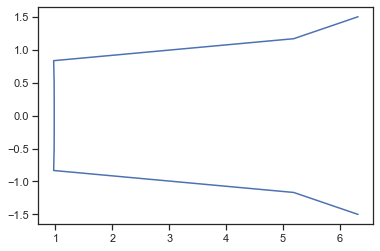

In [184]:
%matplotlib inline

plt.plot(Conductance[5,:],Es)